In [1]:
# Import necessary libraries
import numpy as np  # Efficient numerical operations (arrays, matrices)
import pandas as pd  # Data manipulation and analysis (DataFrames, Series)
import os  # File system interaction (directory walking)

# Import libraries for data visualization
import matplotlib.pyplot as plt  # Used for creating charts and graphs

# Import libraries for data preprocessing
from sklearn import preprocessing  # General preprocessing techniques
from sklearn.preprocessing import StandardScaler  # Specifically for scaling numerical features

# Import library for splitting data into training and testing sets
from sklearn.model_selection import train_test_split  # Splits data for model training and evaluation

# Import library for data exploration and visualization
import seaborn as sns  # Creates informative statistical plots

# Import libraries for building deep learning models (specifically for LSTMs)
from keras.layers import Dense, BatchNormalization, Dropout, LSTM  # Different neural network layer types
from keras.models import Sequential  # Used to create sequential neural network models
from keras.utils import to_categorical  # One-hot encodes categorical variables for neural networks
from keras import callbacks  # Provides tools to monitor and control model training (e.g., EarlyStopping)

# Import libraries for model evaluation metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score  # Various metrics to assess model performance

from tensorflow.keras.callbacks import EarlyStopping  # Import EarlyStopping from TF 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam  # Import Adam optimizer from TF 2.x
from tensorflow.keras.losses import BinaryCrossentropy  # Import BinaryCrossentropy loss from TF 2.x



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Path of the data Set
data = pd.read_csv("/kaggle/input/teadatafinal/TeaData.csv")
data.head()

,Elevation,Grade_Type,TDS_Level_of_Water (ppm),pH_Level_of_Water,Tasting_Temperature (0C),Brewing_Time (min),pH_Value,TDS_Value (ppm),R,G,B,Taste_Type,Acceptance
0,1,1,120.05,6.68,32.34,3,5.01,162.33,223,52,0,1,1
1,1,1,122.90,6.72,32.37,3,5.07,162.96,209,58,4,1,1
2,1,1,125.35,6.77,32.00,3,5.08,160.82,216,53,6,1,1
3,1,1,121.80,6.81,32.34,3,4.93,162.57,209,58,6,1,1
4,1,1,118.45,6.86,32.00,3,5.12,163.44,215,57,3,1,1


In [3]:
# Get the dimensions (number of rows and columns) of the data
data.shape

(1145, 13)

In [4]:

# Get information about the DataFrame, including data types and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Elevation                 1145 non-null   int64  
 1   Grade_Type                1145 non-null   int64  
 2   TDS_Level_of_Water (ppm)  1145 non-null   float64
 3   pH_Level_of_Water         1145 non-null   float64
 4   Tasting_Temperature (0C)  1145 non-null   float64
 5   Brewing_Time (min)        1145 non-null   int64  
 6   pH_Value                  1145 non-null   float64
 7   TDS_Value (ppm)           1145 non-null   float64
 8   R                         1145 non-null   int64  
 9   G                         1145 non-null   int64  
 10  B                         1145 non-null   int64  
 11  Taste_Type                1145 non-null   int64  
 12  Acceptance                1145 non-null   int64  
dtypes: float64(5), int64(8)
memory usage: 116.4 KB


Class counts:
Acceptance 
0    586
1    559
Name: count, dtype: int64

Class percentages:
Acceptance 
0    51.179039
1    48.820961
Name: count, dtype: float64


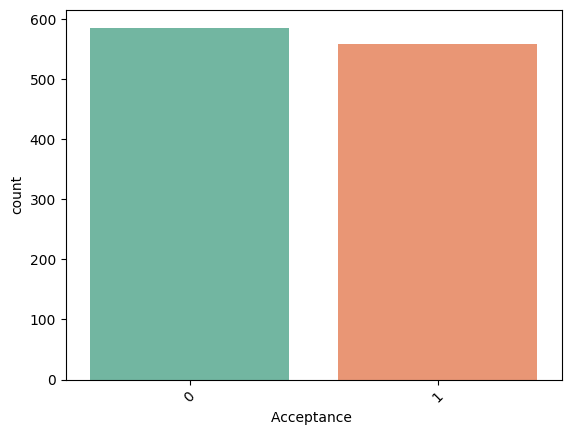

In [5]:
# Create a copy of the data to avoid modifying the original
data_copy = data.copy()

# Count the occurrences of each class in the 'Acceptance ' column
class_counts = data_copy['Acceptance '].value_counts().sort_values(ascending=False)

# Calculate the percentage of each class
class_percentages = (class_counts / len(data_copy)) * 100

# Print the class counts and percentages
print("Class counts:")
print(class_counts)
print("\nClass percentages:")
print(class_percentages)

# Prepare a color palette (adjust colors as desired)
palette = sns.color_palette("Set2")  # Replace with a different palette if needed

# Create a count plot to visualize the class distribution
sns.countplot(
    x="Acceptance ",
    data=data_copy,
    palette=palette
)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)
plt.show()

# Analyze the class percentages to determine if the data is imbalanced
# A significant difference between the majority and minority class percentages
# suggests potential imbalance. You can define a threshold based on your needs.


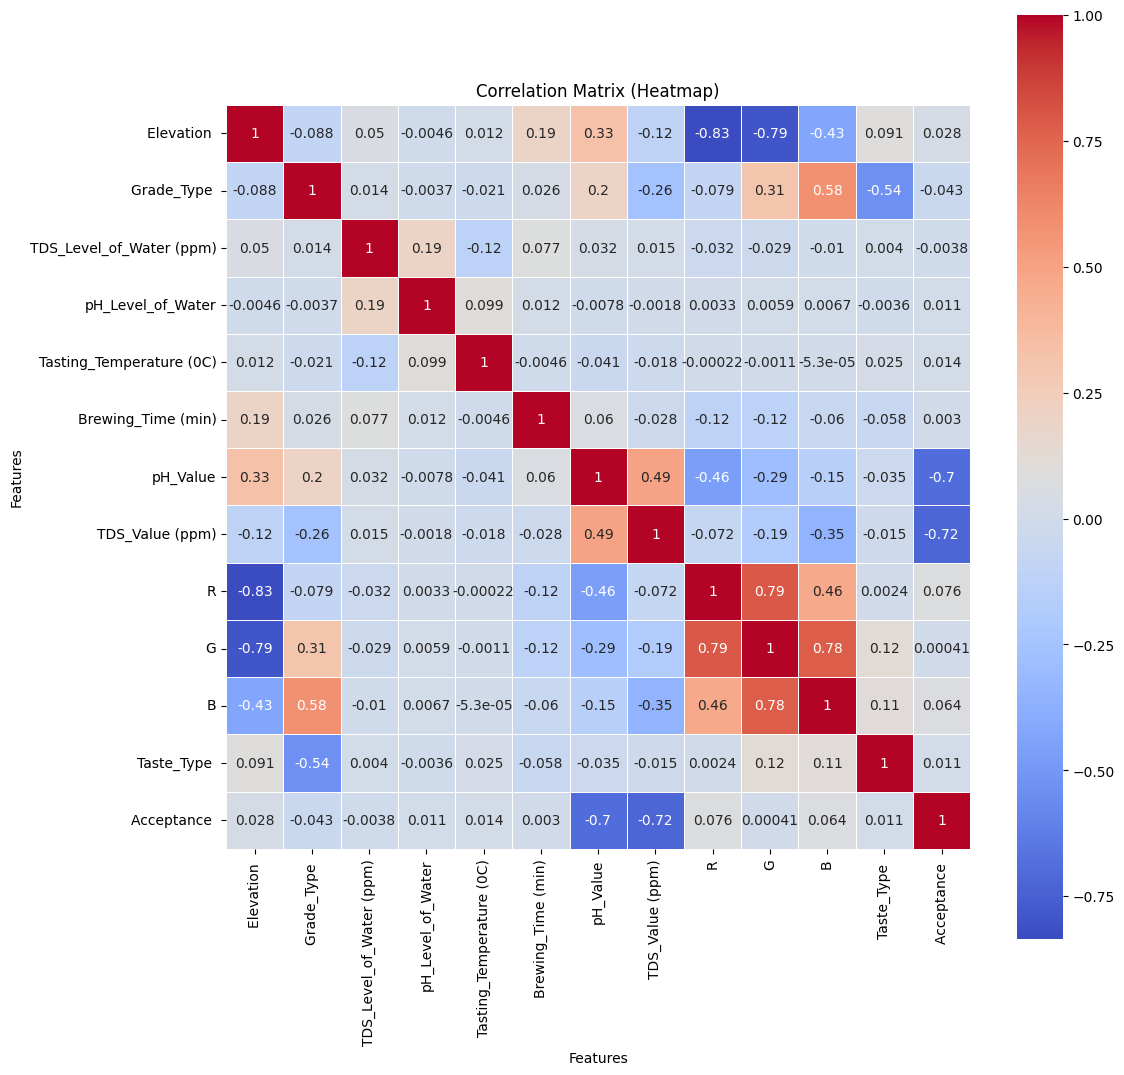

In [6]:
# Create a copy of the data to avoid modifying the original (optional)
# data_copy = data.copy()

# Calculate the correlation matrix
corrmat = data.corr()

# Set a reasonable figure size (adjust as needed)
plt.figure(figsize=(12, 12))  # Adjust width and height for better readability

# Create a heatmap with informative annotations
sns.heatmap(
    corrmat,
    cmap='coolwarm',  # Replace with a different colormap if desired
    annot=True,  # Show correlation values within squares
    square=True,  # Ensure a square heatmap
    linewidths=0.5  # Adjust line width between squares (optional)
);

# Optional labels and title (adjust as needed)
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Matrix (Heatmap)')

plt.show()


Text(0.5, 1.0, 'Distribution Of pH_Value')

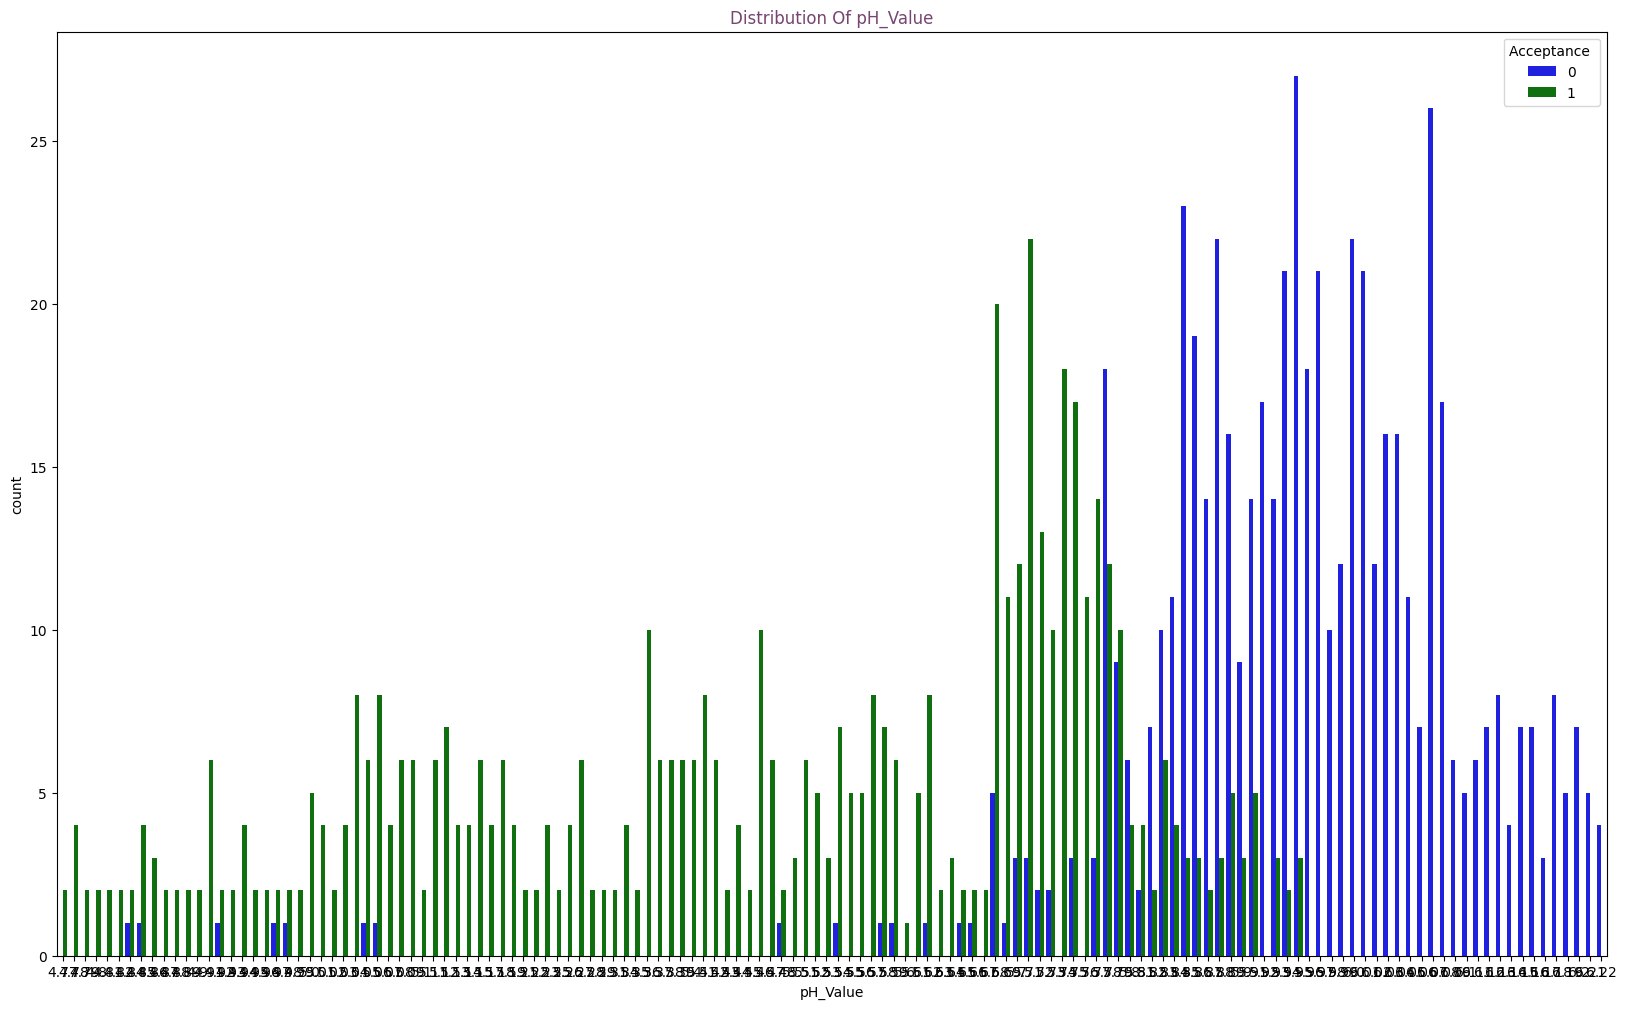

In [7]:

# Define cols
cols = ["blue", "green", "gray"]  # Replace with desired color names or codes

#Evauating pH distrivution 
plt.figure(figsize=(20,12))
#colours =["#774571","#b398af","#f1f1f1" ,"#afcdc7", "#6daa9f"]
pH_Value_of_tea=sns.countplot(x=data['pH_Value'],data=data, hue ="Acceptance ",palette = cols)
pH_Value_of_tea.set_title("Distribution Of pH_Value", color="#774571")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 60.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 58.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-p

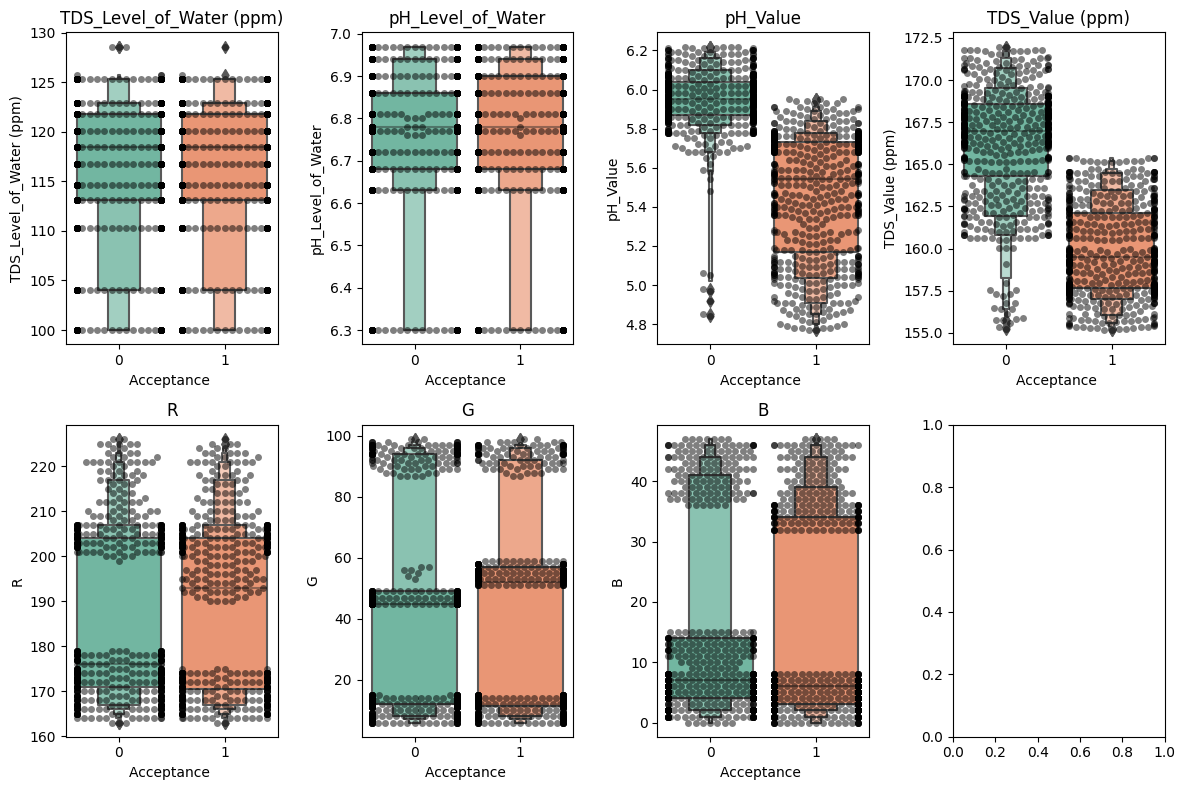

In [8]:

# Define a color palette (adjust as desired)
palette = sns.color_palette("Set2")  # Replace with a different palette if needed

# List of features to explore
features = [
    "TDS_Level_of_Water (ppm)",
    "pH_Level_of_Water",
    "pH_Value",
    "TDS_Value (ppm)",
    "R",
    "G",
    "B",
]

# Create subplots for each feature (adjust number of rows/columns as needed)
rows, cols = 2, 4  # Adjust based on the number of features
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))  # Adjust figsize for better viewing

# Iterate through features and create plots
for i, feature in enumerate(features):
    ax = axes.flat[i]  # Access each subplot efficiently
    sns.swarmplot(x="Acceptance ", y=feature, data=data, color="black", alpha=0.5, ax=ax)
    sns.boxenplot(x="Acceptance ", y=feature, data=data, palette=palette, ax=ax)
    ax.set_title(feature)  # Add title to each subplot

# Adjust layout (optional)
plt.tight_layout()

plt.show()


**KDE PLOT WITH SIGNIFICANT FEATURES**

/tmp/ipykernel_871/2636555543.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/tmp/ipykernel_871/2636555543.py:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed i

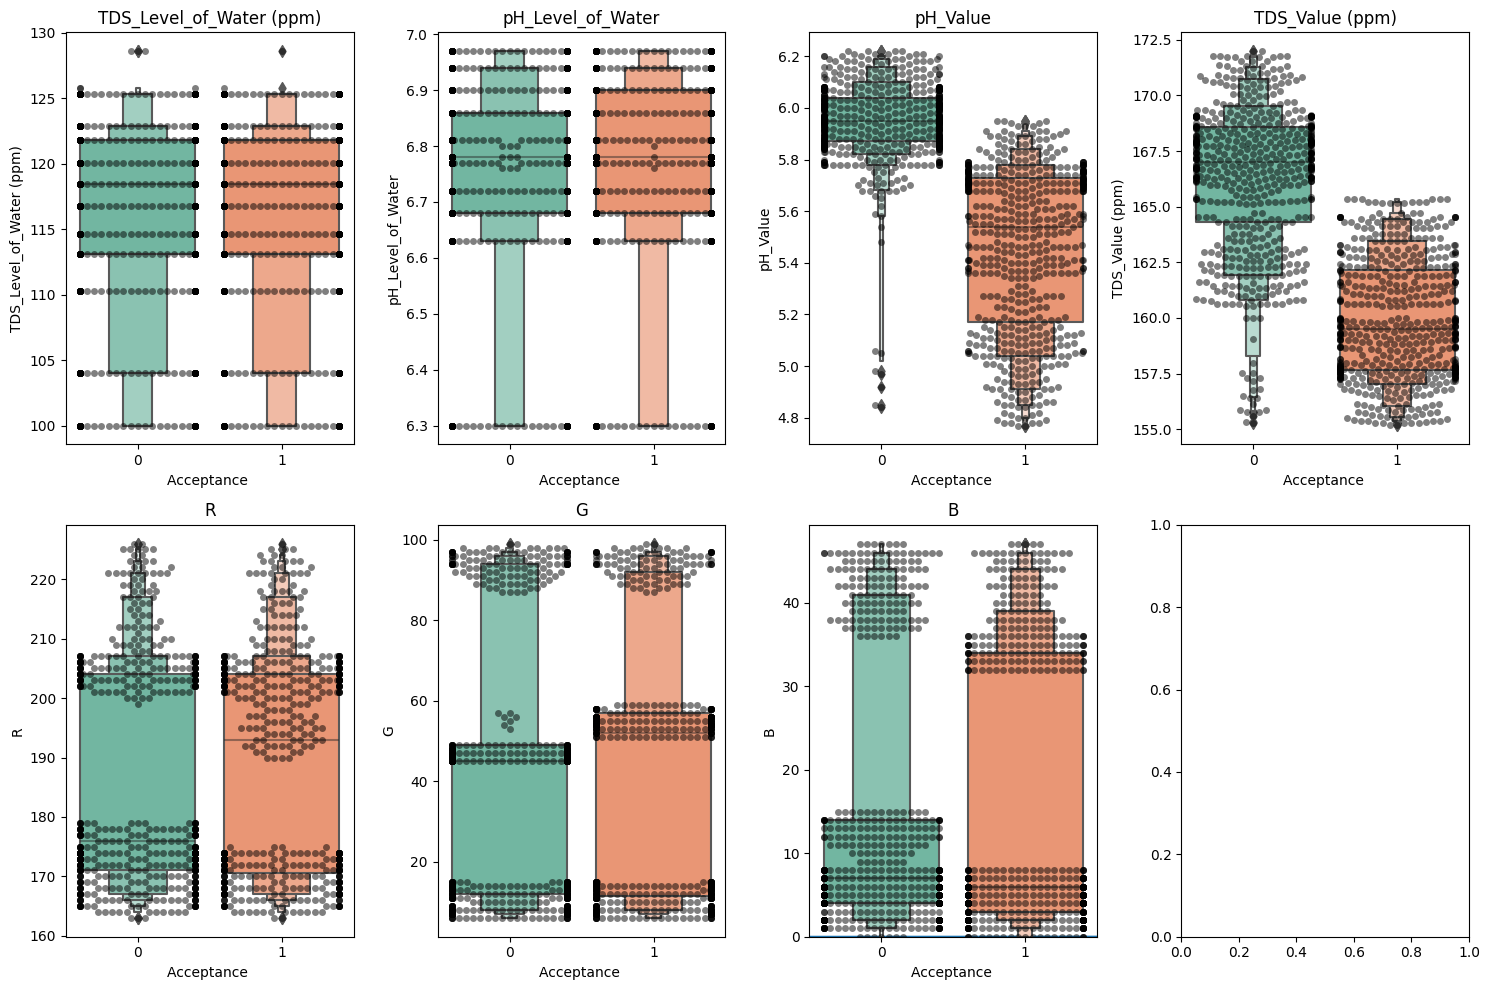

In [9]:
# Define a color palette (adjust as desired)
palette = sns.color_palette("Set2")  # Replace with a different palette if needed

# List of features to explore
features = [
    "TDS_Level_of_Water (ppm)",
    "pH_Level_of_Water",
    "pH_Value",
    "TDS_Value (ppm)",
    "R",
    "G",
    "B",
]

# Create subplots for each feature (adjust number of rows/columns as needed)
rows, cols = 2, 4  # Adjust based on the number of features
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))  # Adjust figsize for better viewing

# Iterate through features and create plots
for i, feature in enumerate(features):
    ax = axes.flat[i]  # Access each subplot efficiently

    # Create kdeplot for the feature
    sns.kdeplot(
        x=data[feature],  # Use the feature data directly
        shade=True,  # Fill the density area
        palette=palette,  # Apply the color palette
        linewidth=1,  # Adjust line width for visibility
        ax=ax,
    )

    # Add swarmplot and boxenplot as before
    sns.swarmplot(x="Acceptance ", y=feature, data=data, color="black", alpha=0.5, ax=ax)
    sns.boxenplot(x="Acceptance ", y=feature, data=data, palette=palette, ax=ax)

    # Add title to each subplot
    ax.set_title(feature)

# Adjust layout (optional)
plt.tight_layout()

plt.show()


In [10]:
# Display descriptive statistics of the DataFrame
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,1145.0,1.849782,0.760798,1.00,1.00,2.00,2.00,3.00
Grade_Type,1145.0,1.851528,0.727074,1.00,1.00,2.00,2.00,3.00
TDS_Level_of_Water (ppm),1145.0,115.798384,7.511359,100.00,113.10,118.45,121.80,128.60
pH_Level_of_Water,1145.0,6.761424,0.169617,6.30,6.68,6.78,6.90,6.97
Tasting_Temperature (0C),1145.0,32.239493,0.170589,31.32,32.00,32.34,32.34,32.39
Brewing_Time (min),1145.0,3.031441,0.248893,3.00,3.00,3.00,3.00,5.00
pH_Value,1145.0,5.708830,0.349633,4.77,5.54,5.80,5.96,6.22
TDS_Value (ppm),1145.0,163.154576,4.419656,155.17,159.29,162.96,167.13,171.99
R,1145.0,187.282096,18.661267,163.00,171.00,177.00,204.00,226.00
G,1145.0,41.405240,32.020671,6.00,12.00,45.00,56.00,99.00


**DATA PREPROCESSING**

In [11]:
#assigning values to features as X and target as y
X=data.drop(["Acceptance "],axis=1)
y=data["Acceptance "]

In [12]:
#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T


,count,mean,std,min,25%,50%,75%,max
Elevation,1145.0,2.482245e-17,1.000437,-1.117449,-1.117449,0.197535,0.197535,1.512519
Grade_Type,1145.0,-1.241123e-16,1.000437,-1.171684,-1.171684,0.204294,0.204294,1.580271
TDS_Level_of_Water (ppm),1145.0,-2.069572e-15,1.000437,-2.104185,-0.359397,0.353168,0.799354,1.705046
pH_Level_of_Water,1145.0,-2.249535e-17,1.000437,-2.721566,-0.480252,0.109567,0.817351,1.230224
Tasting_Temperature (0C),1145.0,-4.791354e-14,1.000437,-5.392464,-1.404534,0.589431,0.589431,0.882661
Brewing_Time (min),1145.0,7.710475e-16,1.000437,-0.126379,-0.126379,-0.126379,-0.126379,7.912718
pH_Value,1145.0,-1.042543e-15,1.000437,-2.686362,-0.483088,0.260874,0.718697,1.462660
TDS_Value (ppm),1145.0,4.716266e-15,1.000437,-1.807395,-0.874789,-0.044044,0.899880,1.999994
R,1145.0,-2.109909e-16,1.000437,-1.301772,-0.872889,-0.551227,0.896253,2.075680
G,1145.0,-1.365235e-16,1.000437,-1.106183,-0.918722,0.112313,0.455991,1.799460


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

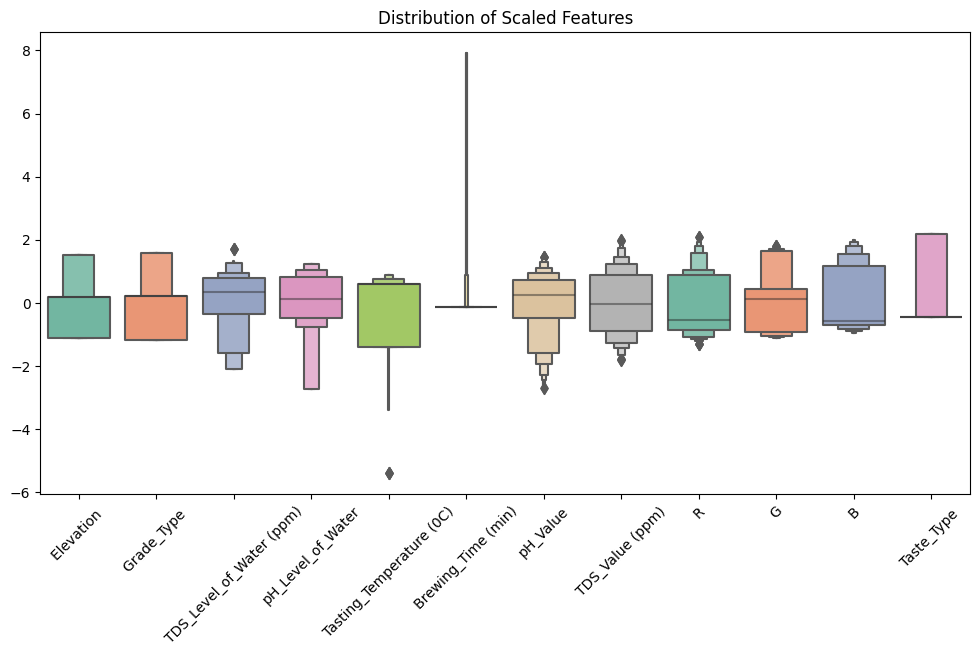

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_df is a pandas DataFrame containing your scaled features

# Set a reasonable figure size (adjust as needed)
plt.figure(figsize=(12, 6))  # Adjust width and height for better clarity

# Create a box plot to visualize the distribution of scaled features
sns.boxenplot(
    data=X_df,  # Use X_df directly for boxplots
    palette="Set2"  # Replace with a different palette if desired
)

# Rotate x-axis labels for readability (optional)
plt.xticks(rotation=45)

# Add a title (optional)
plt.title("Distribution of Scaled Features")

plt.show()


In [14]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.2,random_state=7)
# Explanation of parameters:
# - X_df: The DataFrame containing your features (independent variables).
# - y: The Series or array containing the target variable (dependent variable).
# - test_size (default=0.25): The proportion of data to allocate to the test set (0.2 for 20%).
# - random_state (default=None): Controls the randomness for shuffling data splits. Setting it ensures reproducibility.

**BUILD THE ANN MODEL**

In [15]:

# Early Stopping Callback for Model Training Regulation
early_stopping = EarlyStopping(
    min_delta=0.001,  # Minimum change in monitored metric to consider improvement.
    patience=20,       # Number of epochs with no improvement to wait before stopping.
    restore_best_weights=True  # Restore model weights from the best epoch during training.
)

# Define the Artificial Neural Network (ANN) Architecture
model = Sequential()

# First Hidden Layer with 16 neurons, relu activation, and uniform kernel initializer
model.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=12))

# Second Hidden Layer with 8 neurons, relu activation, and uniform kernel initializer
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))

# Dropout layer with 25% chance of dropping neurons during training to prevent overfitting
model.add(Dropout(0.25))

# Third Hidden Layer with 4 neurons, relu activation, and uniform kernel initializer
model.add(Dense(units=4, kernel_initializer='uniform', activation='relu'))

# Dropout layer with 50% chance of dropping neurons during training to prevent overfitting
model.add(Dropout(0.5))

# Output Layer with 1 neuron, sigmoid activation for binary classification, and uniform kernel initializer
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compile the Model with Adam optimizer, binary crossentropy loss, and accuracy metric
model.compile(optimizer='adam', loss=BinaryCrossentropy(), metrics=['accuracy'])

# Train the Model
history = model.fit(X_train, y_train, batch_size=32, epochs=100, callbacks=[early_stopping], validation_split=0.2)


Epoch 1/100
23/23 [==============================] - 2s 14ms/step - loss: 0.6931 - accuracy: 0.5205 - val_loss: 0.6930 - val_accuracy: 0.5109
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6927 - accuracy: 0.5219 - val_loss: 0.6923 - val_accuracy: 0.5109
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6906 - accuracy: 0.5423 - val_loss: 0.6886 - val_accuracy: 0.5109
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6821 - accuracy: 0.6776 - val_loss: 0.6741 - val_accuracy: 0.8478
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6528 - accuracy: 0.7391 - val_loss: 0.6341 - val_accuracy: 0.9130
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6027 - accuracy: 0.7117 - val_loss: 0.5583 - val_accuracy: 0.9130
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 0.5112 - accuracy: 0.7527 - val_loss: 0.4532 - val_accuracy: 0.9185
Epoch 8/100


In [16]:
# Extract validation accuracy from training history
val_accuracy = np.mean(history.history['val_accuracy'])

# Print validation accuracy with clear formatting
print("\n%s: %.2f%%" % ('validation_accuracy', val_accuracy*100))



validation_accuracy: 92.49%


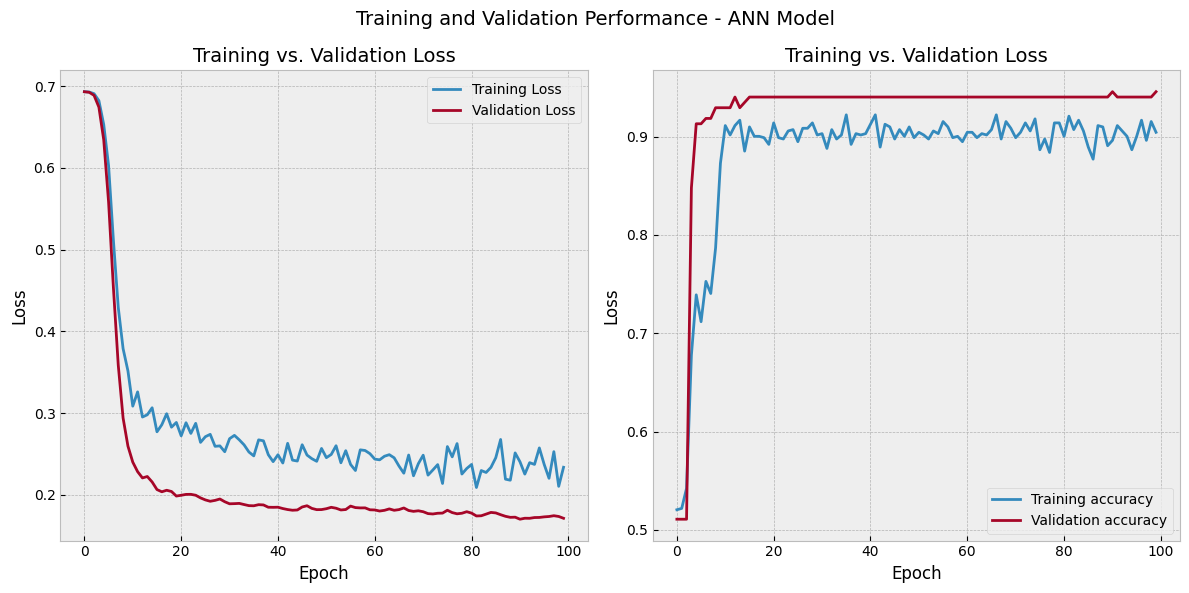

In [17]:
history_df = pd.DataFrame(history.history)
# Set "bmh" style for consistent aesthetics
plt.figure(figsize=(12, 6))
plt.style.use('bmh')

plt.suptitle('Training and Validation Performance - ANN Model', fontsize=14)

# Subplot 1: Loss
plt.subplot(1, 2, 1)
# Plot training and validation loss on the same figure
plt.plot(history_df.loc[:, ['loss']], label='Training Loss')  
plt.plot(history_df.loc[:, ['val_loss']], label='Validation Loss')
plt.title('Training vs. Validation Loss', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right') # Add legend outside the plot area for better readability
plt.grid(True)

# Subplot 2: Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_df.loc[:, ['accuracy']], label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], label='Validation accuracy')
plt.title('Training vs. Validation Loss', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right') # Add legend outside the plot area for better readability
plt.grid(True)

# Grid lines for better visualization (optional)
plt.grid(True)

plt.tight_layout()  # Adjust spacing between elements
plt.show()


In [18]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()

print(classification_report(y_test, y_pred))

8/8 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       110
           1       0.92      1.00      0.96       119

    accuracy                           0.95       229
   macro avg       0.96      0.95      0.95       229
weighted avg       0.96      0.95      0.95       229



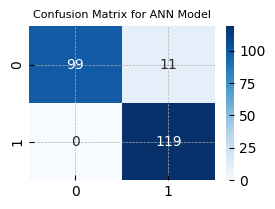

In [19]:
cmap1 = sns.diverging_palette(275, 150, s=40, l=65, n=6)
plt.subplots(figsize=(3,2))
cf_matrix = confusion_matrix(y_test, y_pred)

# Set fmt='d' to format numbers as integers
sns.heatmap(cf_matrix, cmap='Blues', annot=True, annot_kws={'size': 10}, fmt='g')
plt.title('Confusion Matrix for ANN Model',fontsize=8)
plt.show()